In [1]:
# PACKAGE
import numpy as np
import numpy.linalg as la
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#PageRank for an arbitrarily sized internet

In [ ]:
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    
    r = 100 * np.ones(n) / n
    lastR = r
    r = M @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = M @ r
        i += 1
   
    
    return r


# Dataset

In [2]:
df = pd.read_csv("/content/drive/My Drive/BENMAX-ITS/Programming/PageRank_COVID-19/assets/responses_matrix.csv", sep=';')
df = df.drop(columns="id")

In [ ]:
print(df)

    A  B  C  D  E  F  G  H  I  J  K  ...  AF  AG  AH  AI  AJ  AK  AL  AM  AN  AO  AP
0   0  1  0  0  1  0  0  0  1  0  0  ...   0   0   0   0   1   0   0   1   0   0   0
1   0  1  0  0  0  1  0  0  1  0  0  ...   0   0   0   0   1   0   0   1   0   0   0
2   0  1  0  0  1  0  0  0  1  0  0  ...   1   1   0   1   0   0   0   1   0   0   0
3   0  1  0  0  0  0  0  1  0  0  0  ...   0   1   0   0   0   1   1   0   0   0   0
4   0  1  0  1  0  0  0  1  0  0  0  ...   0   1   0   0   0   1   1   0   0   0   0
5   1  0  0  0  1  0  0  0  1  0  0  ...   0   1   0   1   0   0   1   0   0   0   0
6   0  1  0  0  1  0  0  1  0  0  0  ...   0   1   0   0   0   1   0   1   0   0   0
7   0  0  0  0  0  1  0  0  1  0  0  ...   1   1   0   0   1   0   0   1   0   0   1
8   0  1  0  0  0  0  1  0  0  1  0  ...   1   1   0   0   1   0   0   0   1   1   0
9   1  1  0  0  0  0  0  1  0  0  0  ...   0   1   0   0   1   0   0   1   0   0   0
10  1  1  0  0  1  0  0  0  1  0  0  ...   1   1   0   0   1   0 

In [3]:
total = df.iloc[0]
for r in range(1,len(df)):
  total = total + df.iloc[r]
print(total)

A      9
B     17
C      2
D      3
E      8
F      4
G      3
H      4
I     10
J      4
K      2
L      5
M     19
N     14
O      6
P      6
Q     17
R      4
S     16
T     12
U     18
V     16
W     15
X      6
Y     11
Z     10
AA     4
AB    16
AC    12
AD     3
AE    11
AF     9
AG    14
AH     1
AI     3
AJ    10
AK     6
AL     5
AM    12
AN     3
AO     1
AP     1
dtype: int64


In [ ]:
total[1]-total[0]

8

##NetworkX

#1. dari total cek semuanya, kecil tunjuk besar, weight selisih

In [17]:
dir = []
for i in range(len(total)):
  for j in range(i+1, len(total)):
    print('i:', i)
    print('j:', j)
    
    if i<=25:
      if j<=25:
        if total[i]>total[j]:
          dir.append([chr(65+j), chr(65+i), total[i]-total[j]])
          print(chr(65+j), chr(65+i), total[i]-total[j])
        elif total[i]<total[j]:
          dir.append([chr(65+i), chr(65+j), total[j]-total[i]])
          print([chr(65+i), chr(65+j), total[j]-total[i]])
      elif j>25:
        if total[i]>total[j]:
          dir.append([chr(39+j), "A" + chr(65+i), total[i]-total[j]])
          print(chr(39+j), chr(65+i), total[i]-total[j])
        elif total[i]<total[j]:
          dir.append(["A" + chr(65+i), chr(39+j), total[j]-total[i]])
          print([chr(65+i), chr(39+j), total[j]-total[i]])
  
    elif i>25:
      if total[i]>total[j]:
        dir.append(["A" + chr(39+j), "A" + chr(39+i), total[i]-total[j]])
        print(["A" + chr(39+j), "A" + chr(39+i), total[i]-total[j]])
      elif total[i]<total[j]:
        dir.append(["A" + chr(39+i), "A" + chr(39+j), total[j]-total[i]])
        print(["A" + chr(39+i), "A" + chr(39+j), total[j]-total[i]])
    print()
print(dir)


i: 0
j: 1
['A', 'B', 8]

i: 0
j: 2
C A 7

i: 0
j: 3
D A 6

i: 0
j: 4
E A 1

i: 0
j: 5
F A 5

i: 0
j: 6
G A 6

i: 0
j: 7
H A 5

i: 0
j: 8
['A', 'I', 1]

i: 0
j: 9
J A 5

i: 0
j: 10
K A 7

i: 0
j: 11
L A 4

i: 0
j: 12
['A', 'M', 10]

i: 0
j: 13
['A', 'N', 5]

i: 0
j: 14
O A 3

i: 0
j: 15
P A 3

i: 0
j: 16
['A', 'Q', 8]

i: 0
j: 17
R A 5

i: 0
j: 18
['A', 'S', 7]

i: 0
j: 19
['A', 'T', 3]

i: 0
j: 20
['A', 'U', 9]

i: 0
j: 21
['A', 'V', 7]

i: 0
j: 22
['A', 'W', 6]

i: 0
j: 23
X A 3

i: 0
j: 24
['A', 'Y', 2]

i: 0
j: 25
['A', 'Z', 1]

i: 0
j: 26
A A 5

i: 0
j: 27
['A', 'B', 7]

i: 0
j: 28
['A', 'C', 3]

i: 0
j: 29
D A 6

i: 0
j: 30
['A', 'E', 2]

i: 0
j: 31

i: 0
j: 32
['A', 'G', 5]

i: 0
j: 33
H A 8

i: 0
j: 34
I A 6

i: 0
j: 35
['A', 'J', 1]

i: 0
j: 36
K A 3

i: 0
j: 37
L A 4

i: 0
j: 38
['A', 'M', 3]

i: 0
j: 39
N A 6

i: 0
j: 40
O A 8

i: 0
j: 41
P A 8

i: 1
j: 2
C B 15

i: 1
j: 3
D B 14

i: 1
j: 4
E B 9

i: 1
j: 5
F B 13

i: 1
j: 6
G B 14

i: 1
j: 7
H B 13

i: 1
j: 8
I B 7

i: 1
j: 

In [18]:
DG = nx.DiGraph()

DG.add_weighted_edges_from(dir)


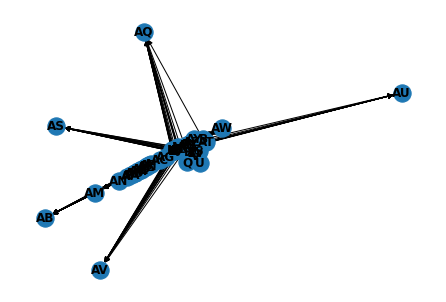

In [19]:
nx.draw(DG, with_labels=True, font_weight='bold')

In [20]:
weight = nx.algorithms.link_analysis.pagerank_alg.pagerank(DG)

In [21]:
weight

{'A': 0.00983203754809148,
 'AA': 0.008340025598592144,
 'AB': 0.0776240214376323,
 'AC': 0.012663914444808598,
 'AD': 0.006457234287110946,
 'AE': 0.012735996858442171,
 'AF': 0.010107803910962316,
 'AG': 0.03174041237389362,
 'AH': 0.00639275179626909,
 'AI': 0.008230375294041796,
 'AJ': 0.010858388332631239,
 'AK': 0.007948260326254451,
 'AL': 0.007805501695677693,
 'AM': 0.05808620986374359,
 'AN': 0.015901506299699265,
 'AO': 0.006853930085114668,
 'AP': 0.006853930085114668,
 'AQ': 0.03231750681234621,
 'AR': 0.00639275179626909,
 'AS': 0.022683722867845868,
 'AT': 0.008894185040397951,
 'AU': 0.041951290756846546,
 'AV': 0.022683722867845868,
 'AW': 0.019172283636490012,
 'AX': 0.006853930085114668,
 'AY': 0.008377549746935237,
 'AZ': 0.007989713399476673,
 'B': 0.07202674614604941,
 'C': 0.019527284559630684,
 'D': 0.006384920859723637,
 'E': 0.01894053889691726,
 'F': 0.01322699347830334,
 'G': 0.027881966693300193,
 'H': 0.0064518021537879455,
 'I': 0.00994393523703804,
 'J':

In [22]:
df_weight = pd.DataFrame(weight, index = [0])

In [23]:
df_weight

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,AV,AW,AX,AY,AZ
0,0.009832,0.072027,0.019527,0.006385,0.018941,0.013227,0.027882,0.006452,0.009944,0.014847,0.008861,0.008596,0.118288,0.014695,0.00731,0.00731,0.025421,0.006452,0.018451,0.011764,0.045715,0.018451,0.015963,0.00731,0.010665,0.009767,0.00834,0.077624,0.012664,0.006457,0.012736,0.010108,0.03174,0.006393,0.00823,0.010858,0.007948,0.007806,0.058086,0.015902,0.006854,0.006854,0.032318,0.006393,0.022684,0.008894,0.041951,0.022684,0.019172,0.006854,0.008378,0.00799


In [24]:
weight.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ'])

In [25]:
weight_list= []
for i in weight.keys():
  weight_list.append(weight[i])


In [26]:
weight_dict = {'Nilai':weight_list}
weight_dict

{'Nilai': [0.00983203754809148,
  0.07202674614604941,
  0.019527284559630684,
  0.006384920859723637,
  0.01894053889691726,
  0.01322699347830334,
  0.027881966693300193,
  0.0064518021537879455,
  0.00994393523703804,
  0.014846647879304311,
  0.00886081551058546,
  0.008595854790090665,
  0.11828775076947937,
  0.014695151432128907,
  0.007310284140864487,
  0.007310284140864487,
  0.0254207741601296,
  0.0064518021537879455,
  0.018451259201041757,
  0.011764239414668212,
  0.045715436829990214,
  0.018451259201041757,
  0.01596292132527137,
  0.007310284140864487,
  0.01066495869579251,
  0.009767130941695804,
  0.008340025598592144,
  0.0776240214376323,
  0.012663914444808598,
  0.006457234287110946,
  0.012735996858442171,
  0.010107803910962316,
  0.03174041237389362,
  0.00639275179626909,
  0.008230375294041796,
  0.010858388332631239,
  0.007948260326254451,
  0.007805501695677693,
  0.05808620986374359,
  0.015901506299699265,
  0.006853930085114668,
  0.00685393008511466

In [27]:
df_weight = pd.DataFrame(weight_dict)
df_weight.insert(loc = 0, column = "Node", value = weight.keys())
df_weight

,Node,Nilai
0,A,0.009832
1,B,0.072027
2,C,0.019527
3,D,0.006385
4,E,0.018941
5,F,0.013227
6,G,0.027882
7,H,0.006452
8,I,0.009944
9,J,0.014847


In [28]:
df_weight_sorted=df_weight.sort_values(by=['Nilai'], ascending=False)

In [29]:
df_weight_sorted

,Node,Nilai
12,M,0.118288
27,AB,0.077624
1,B,0.072027
38,AM,0.058086
20,U,0.045715
46,AU,0.041951
42,AQ,0.032318
32,AG,0.031740
6,G,0.027882
16,Q,0.025421


In [30]:
df_weight_sorted.to_csv("/content/drive/My Drive/BENMAX-ITS/Programming/PageRank_COVID-19/models/weight_1.csv")